# IFEWS Notebook for acquiring, preparing and posting the data.

Author: Julia Brittes Tuthill

Date Start: June 21, 2022

Project: IFEWs Visualization version 1 - Animal, Crop and Nrate data, Ns calculation

In [101]:
import warnings
warnings.filterwarnings('ignore')

## USDA Get Data

##### This section of the notebook refers to the IFEW acquiring of data from USDA Quickstats

Project Part: Query Learning USDA QuickStats API

<span style='color:Red'> Make this section auto updatable yearly. </span>

See Quick Stats (NASS) API user guide:  https://quickstats.nass.usda.gov/api

Workflow of this section is illustraded below:
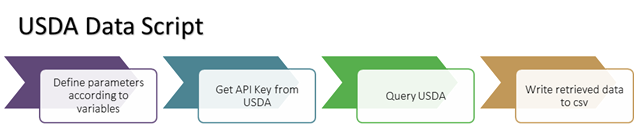

In [ ]:
import urllib.request
from requests.utils import requote_uri

class c_usda_quick_stats:

    def __init__(self):

        # Set the USDA QuickStats API key, API base URL, and output file path where CSV files will be written. 

        self.api_key = '3D938026-FDA3-38A5-8D6E-F98DF6EEE332'

        self.base_url_api_get = 'http://quickstats.nass.usda.gov/api/api_GET/?key=' + self.api_key + '&'

        self.output_file_path = r'C:\\Users\jbrittes\Documents\Research\IFEW - Database Flow\ArcGIS\USDA_files\\'

    def get_data(self, parameters, file_name):

        # Call the api_GET api with the specified parameters. 
        # Write the CSV data to the specified output file.

        # Create the full URL and retrieve the data from the Quick Stats server.
        
        full_url = self.base_url_api_get + parameters
        s_result = urllib.request.urlopen(full_url)
        s_text = s_result.read().decode('utf-8')

        # Create the output file and write the CSV data records to the file.

        s_file_name = self.output_file_path + file_name + ".csv"
        o_file = open(s_file_name, "w", encoding="utf8")
        o_file.write(s_text)
        o_file.close()

In [ ]:
# Create an instance of the c_usda_quick_stats class. Call it with the desired search parameter and output file name.
myPythonModules = r'C:\Users\jbrittes\Documents\Research\IFEW - Database Flow\ArcGIS'
sys.path.append(myPythonModules)
from c_usda_quick_stats import c_usda_quick_stats

### Crop Data

In [ ]:
#Corn Grain Yield Bu/Acre
parameters1 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&commodity_desc=CORN' + \
                '&statisticcat_desc=YIELD' + \
                '&util_practice_desc=GRAIN' + \
                '&' + urllib.parse.quote('short_desc=CORN, GRAIN - YIELD, MEASURED IN BU / ACRE') + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

#Soybean Yield Bu/Acre
parameters2 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&commodity_desc=SOYBEANS' + \
                '&statisticcat_desc=YIELD' + \
                '&' + urllib.parse.quote('short_desc=SOYBEANS - YIELD, MEASURED IN BU / ACRE') + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&format=CSV'

#Corn Silage Yield Tons/Acre
parameters3 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&commodity_desc=CORN' + \
                '&statisticcat_desc=YIELD' + \
                '&util_practice_desc=SILAGE' + \
                '&' + urllib.parse.quote('short_desc=CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE') + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

#Corn Area Planted Acres
parameters4 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&commodity_desc=CORN' + \
                '&statisticcat_desc__LIKE=PLANTED' + \
                '&' + urllib.parse.quote('short_desc=CORN - ACRES PLANTED') + \
                '&unit_desc=ACRES' + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

#Corn Area Harvested Acres (grain)
parameters50 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&commodity_desc=CORN' + \
                '&util_practice_desc=GRAIN' + \
                '&statisticcat_desc__LIKE=HARVESTED' + \
                '&' + urllib.parse.quote('short_desc=CORN, GRAIN - ACRES HARVESTED') + \
                '&unit_desc=ACRES' + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

#Corn Area Harvested Acres (silage)
parameters51 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&commodity_desc=CORN' + \
                '&util_practice_desc=SILAGE' + \
                '&statisticcat_desc__LIKE=HARVESTED' + \
                '&' + urllib.parse.quote('short_desc=CORN, SILAGE - ACRES HARVESTED') + \
                '&unit_desc=ACRES' + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

#Soybean Area Planted Acres
parameters6 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&' + urllib.parse.quote('group_desc=FIELD CROPS') + \
                '&commodity_desc=SOYBEANS' + \
                '&statisticcat_desc__LIKE=PLANTED' + \
                '&' + urllib.parse.quote('short_desc=SOYBEANS - ACRES PLANTED') + \
                '&unit_desc=ACRES' + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

#Soybean Area Harvested Acres
parameters7 =    'source_desc=SURVEY' +  \
                '&sector_desc=CROPS' + \
                '&' + urllib.parse.quote('group_desc=FIELD CROPS') + \
                '&commodity_desc=SOYBEANS' + \
                '&statisticcat_desc__LIKE=HARVESTED' + \
                '&' + urllib.parse.quote('short_desc=SOYBEANS - ACRES PLANTED') + \
                '&unit_desc=ACRES' + \
                '&freq_desc=ANNUAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

### Animal Data

In [ ]:
# Live Population of Hogs
parameters8 =    'source_desc=CENSUS' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=LIVESTOCK' + \
                '&commodity_desc=HOGS' + \
                '&class_desc__LIKE=CLASSES' + \
                '&prodn_practice_desc__NOT_LIKE=CONTRACT' + \
                '&statisticcat_desc=INVENTORY' + \
                '&statisticcat_desc__NE=SALES' + \
                '&' + urllib.parse.quote('short_desc__LIKE=HOGS - INVENTORY') + \
                '&unit_desc=HEAD' + \
                '&domain_desc=TOTAL' + \
                '&' + urllib.parse.quote('freq_desc=POINT IN TIME') + \
                '&' + urllib.parse.quote('reference_period_desc=END OF DEC') + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

# Live Population of Beef Cows
parameters9 =    'source_desc=CENSUS' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=LIVESTOCK' + \
                '&commodity_desc=CATTLE' + \
                '&class_desc__LIKE=BEEF' + \
                '&statisticcat_desc=INVENTORY' + \
                '&domain_desc=TOTAL' + \
                '&' + urllib.parse.quote('domaincat_desc=NOT SPECIFIED') + \
                '&unit_desc=HEAD' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

# Live Population of Milk Cows
parameters10 =    'source_desc=CENSUS' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=LIVESTOCK' + \
                '&commodity_desc=CATTLE' + \
                '&class_desc__LIKE=MILK' + \
                '&statisticcat_desc=INVENTORY' + \
                '&domain_desc=TOTAL' + \
                '&' + urllib.parse.quote('domaincat_desc=NOT SPECIFIED') + \
                '&unit_desc=HEAD' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

# Live Population of Other Cattle (excl cows)
parameters11 =    'source_desc=CENSUS' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=LIVESTOCK' + \
                '&commodity_desc=CATTLE' + \
                '&class_desc__LIKE=EXCL' + \
                '&class_desc__LIKE=COWS' + \
                '&statisticcat_desc=INVENTORY' + \
                '&domain_desc=TOTAL' + \
                '&' + urllib.parse.quote('domaincat_desc=NOT SPECIFIED') + \
                '&unit_desc=HEAD' + \
                '&year__GE=1997' + \
                '&agg_level_desc=COUNTY' + \
                '&state_name=IOWA' + \
                '&county_code__LT=998' + \
                '&format=CSV'

# Slaughtered Population Hogs
parameters12 =    'source_desc=SURVEY' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=LIVESTOCK' + \
                '&commodity_desc=HOGS' + \
                '&class_desc__LIKE=ALL' + \
                '&util_practice_desc__LIKE=SLAUGHTER'+ \
                '&domain_desc=TOTAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=STATE' + \
                '&state_name=IOWA' + \
                '&format=CSV'

# Slaughtered Population Cattle - NO DIFFERENTIATION BETWEEN BULLS, CALVES, COWS, WEIGHT, HEIFERS AND STEERS - look into this
parameters13 =    'source_desc=SURVEY' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=LIVESTOCK' + \
                '&commodity_desc=CATTLE' + \
                '&util_practice_desc__LIKE=SLAUGHTER'+ \
                '&domain_desc=TOTAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=STATE' + \
                '&state_name=IOWA' + \
                '&format=CSV'

# Slaughtered Population Poultry Slaughtered in LB live basis
parameters14 =    'source_desc=SURVEY' +  \
                '&' + urllib.parse.quote('sector_desc=ANIMALS & PRODUCTS') + \
                '&group_desc=POULTRY' + \
                '&commodity_desc__LIKE=TOTALS' + \
                '&statisticcat_desc=SLAUGHTERED'+ \
                '&domain_desc=TOTAL' + \
                '&reference_period_desc=YEAR' + \
                '&year__GE=1997' + \
                '&agg_level_desc=NATIONAL' + \
                '&format=CSV'

#### Loop through all parameters

In [ ]:
parameters = [parameters1, parameters2, parameters3, parameters4, parameters50, parameters51, parameters6, parameters7, parameters8, parameters9, parameters10, parameters11, parameters12, parameters13, parameters14]

# create a list of file names - should be 15 total
names_csv = ['corn_grain_yield_buperacre_counties_ifew_ge1997', 'soybeans_yield_buperacre_counties_ifew_ge1997','corn_silage_yield_tonsperacre_counties_ifew_ge1997','corn_area_planted_acres_counties_ifew_ge1997','corn_grain_area_harvested_acres_counties_ifew_ge1997', 'corn_silage_area_harvested_acres_counties_ifew_ge1997','soybeans_area_planted_acres_counties_ifew_ge1997','soybeans_area_harvested_acres_counties_ifew_ge1997','hogs_head_inventory_counties_ifew_ge1997','beef_cows_head_inventory_counties_ifew_ge1997','milk_cows_head_inventory_counties_ifew_ge1997','other_cattle_head_inventory_counties_ifew_ge1997','hogs_slaughtered_head_state_ifew_ge1997','cattle_slaughtered_head_state_ifew_ge1997','poultry_slaughtered_pounds_us_ifew_ge1997']

# create a loop to go through all files - make sure list of file names and parameters are in the same sequence for coherence
for i in range(len(parameters)):
    stats = c_usda_quick_stats()
    
    s_json = stats.get_data(parameters[i], names_csv[i])

## N fertilizer from Raster to Counties/AgDistricts feature class

All the data comes from <a href="https://doi.pangaea.de/10.1594/PANGAEA.883585">Agricultural nitrogen fertilizer uses in the continental U.S. during 1850-2015: a set of gridded time-series data. PANGAEA</a> and the added rates given by Peiyu Cao (Iowa State) (**ALL DATA FROM FOLDER IN LB N/Acre**) in the format of 4km grids with rates in lb/acre, from 1850 to 2019 (we are interested only in 1997 to present). They are working on updating the data till present time. So more data can be added using the following script.

The workflow of the processes covered here is illustraded below.

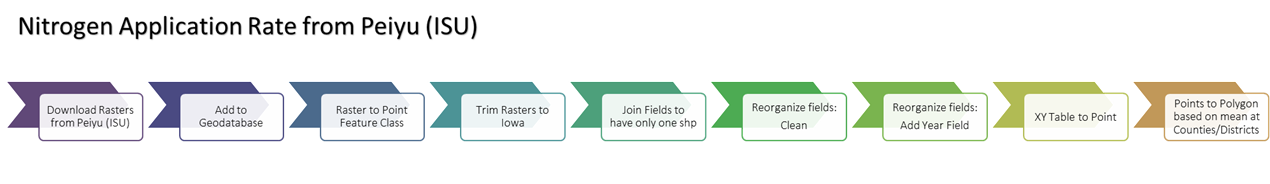

### Rasters to Geodatabase

First, we will add all the shared files to our geodatabase to then geoprocess them.

In [1]:
import os
import arcpy

# Import system modules
from arcpy import env
# Export as New Feature
arcpy.env.overwriteOutput = True

# path
dir_name1 = r'C:\\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\\'

files = os.listdir(dir_name1)

In [2]:
# select only files containing years of interest. And as .tif
# remove folder N fertilizer data
files = [x for x in files if "N fertilizer data" not in x]

# remove unwanted years
y = [i for i in range(1900,1997,1)]
y = [str(x) for x in y]
for i in range(len(y)):
    files = [x for x in files if y[i] not in x]

In [3]:
for file in files:
    f = os.path.join(dir_name1, file)
    arcpy.conversion.RasterToGeodatabase(f, r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb", '')

In [4]:
# Set the current workspace
arcpy.env.workspace = r'C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\\'

# Get and print a list of GRIDs from the workspace
rasters = arcpy.ListRasters("*", "GRID")

#### Raster to feature class

Transform each raster to a feature class

<span style='color:Red'> If years added to the model, the next line needs to accomodate those changes.  </span>

In [ ]:
import jupyter_contrib_nbextensions

In [5]:
names = ['Nrate_1997', 'Nrate_1998', 'Nrate_1999', 'Nrate_2000','Nrate_2001', 'Nrate_2002', 'Nrate_2003', 'Nrate_2004',
        'Nrate_2005', 'Nrate_2006', 'Nrate_2007', 'Nrate_2008', 'Nrate_2009', 'Nrate_2010', 'Nrate_2011', 'Nrate_2012',
        'Nrate_2013', 'Nrate_2014', 'Nrate_2015', 'Nrate_2016', 'Nrate_2017', 'Nrate_2018', 'Nrate_2019']
i = 0
for raster in rasters:
    name = names[i] + ".shp"
    arcpy.conversion.RasterToPoint(raster, name, "Value")
    i = i+1

IndexError: list index out of range

#### Trim Rasters

Trim raster to have only Iowa data

In [6]:
# Set the current workspace
arcpy.env.workspace = r'C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\\'

In [7]:
path = r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb"
for feature in names:
    feature_name = os.path.join(path, "Clip_" + feature)
    arcpy.analysis.Clip(feature, r'C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_border', feature_name, None)   

##### Change fields names for organization previous to join

In [8]:
#Change environment
# Set the current workspace
arcpy.env.workspace = r'C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\\'

features = arcpy.ListFeatureClasses()

# only look at clipped features
# remove folder N fertilizer data
features = [x for x in features if "Clip" in x]

In [9]:
n_name = names
for i in range(len(names)):
    n_name[i]=names[i].replace(".shp", "")

i=0
for feature in features:
    fields = arcpy.ListFields(feature)
    for field in fields:
        if field.name == "grid_code":
        # Rename new fields
            n = n_name[i]
            arcpy.AlterField_management(feature, field.name, new_field_name = n, new_field_alias = n)
    i = i+1    

#### Join Fields

In [10]:
# only look at clipped features
# remove folder N fertilizer data
features = [x for x in features if "Clip" in x]
# Remove the 1st feature (1997). This will be the in_layer_or_view
base = 'Clip_Nrate_1997'
features = [x for x in features if "1997" not in x]

In [11]:
for feature in features:
    arcpy.management.AddJoin(base, "pointid", feature, "pointid", "KEEP_ALL", "NO_INDEX_JOIN_FIELDS")
    
# Export to gdb
arcpy.management.CopyFeatures(base, "nrate_join")

# Remember to remove join once is done and saved as feature class in gdb 
for feature in features:
    arcpy.management.RemoveJoin(base,  feature)  

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000800: The value is not a member of .
Failed to execute (RemoveJoin).


##### Reoganize fields

In [12]:
#remove all layers besides nrate_join - this has everything we need

In [13]:
p = arcpy.mp.ArcGISProject("CURRENT")
m = p.listMaps()[0]

In [29]:
layers = m.listLayers()
for layer in layers:
    if layer.name != "nrate_join":
        m.removeLayer(layer)

In [30]:
path = r'C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb'
n_path = os.path.join(path, "nrate_join")

fields = arcpy.ListFields(n_path)

In [31]:
for field in fields:
    if "Clip" in field.name:
        if "1997" not in field.name:
            if "OBJECTID" in field.aliasName or "pointid" in field.aliasName:
                arcpy.management.DeleteField("nrate_join", field.name)

In [32]:
# add xy coordinates
arcpy.management.AddXY("nrate_join")

<Result 'nrate_join'>

In [33]:
# transpose fields
arcpy.management.TransposeFields("nrate_join", "Clip_Nrate_1997_Nrate_1997 Clip_Nrate_1997_Nrate_1997;Clip_Nrate_1998_Nrate_1998 Clip_Nrate_1998_Nrate_1998;Clip_Nrate_1999_Nrate_1999 Clip_Nrate_1999_Nrate_1999;Clip_Nrate_2000_Nrate_2000 Clip_Nrate_2000_Nrate_2000;Clip_Nrate_2001_Nrate_2001 Clip_Nrate_2001_Nrate_2001;Clip_Nrate_2002_Nrate_2002 Clip_Nrate_2002_Nrate_2002;Clip_Nrate_2003_Nrate_2003 Clip_Nrate_2003_Nrate_2003;Clip_Nrate_2004_Nrate_2004 Clip_Nrate_2004_Nrate_2004;Clip_Nrate_2005_Nrate_2005 Clip_Nrate_2005_Nrate_2005;Clip_Nrate_2006_Nrate_2006 Clip_Nrate_2006_Nrate_2006;Clip_Nrate_2007_Nrate_2007 Clip_Nrate_2007_Nrate_2007;Clip_Nrate_2008_Nrate_2008 Clip_Nrate_2008_Nrate_2008;Clip_Nrate_2009_Nrate_2009 Clip_Nrate_2009_Nrate_2009;Clip_Nrate_2010_Nrate_2010 Clip_Nrate_2010_Nrate_2010;Clip_Nrate_2011_Nrate_2011 Clip_Nrate_2011_Nrate_2011;Clip_Nrate_2012_Nrate_2012 Clip_Nrate_2012_Nrate_2012;Clip_Nrate_2013_Nrate_2013 Clip_Nrate_2013_Nrate_2013;Clip_Nrate_2014_Nrate_2014 Clip_Nrate_2014_Nrate_2014;Clip_Nrate_2015_Nrate_2015 Clip_Nrate_2015_Nrate_2015;Clip_Nrate_2016_Nrate_2016 Clip_Nrate_2016_Nrate_2016;Clip_Nrate_2017_Nrate_2017 Clip_Nrate_2017_Nrate_2017;Clip_Nrate_2018_Nrate_2018 Clip_Nrate_2018_Nrate_2018;Clip_Nrate_2019_Nrate_2019 Clip_Nrate_2019_Nrate_2019", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\nrate_join_T", "yy", "Value", "Clip_Nrate_1997_pointid;POINT_X;POINT_Y")

# create  base_year Field 
arcpy.management.AddField("nrate_join_T", 'base_year', "TEXT")

# calculate based on year field
arcpy.management.CalculateField("nrate_join_T", "base_year", "!yy![11:15]", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")

# Convert Time Field from base_year
arcpy.management.ConvertTimeField("nrate_join_T", "base_year", "yyyy", "Year", "DATE", '')

# Delete year and base_year fields
arcpy.management.DeleteField("nrate_join_T", "yy")
arcpy.management.DeleteField("nrate_join_T", "base_year")


<Result 'nrate_join_T'>

In [34]:
# xy table to point
arcpy.management.XYTableToPoint("nrate_join_T", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\nrate", "POINT_X", "POINT_Y", None, 'PROJCS["Albers_Conical_Equal_Area",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers"],PARAMETER["false_easting",0.0],PARAMETER["false_northing",0.0],PARAMETER["central_meridian",-96.0],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_origin",23.0],UNIT["Meter",1.0]];-16901100 -6972200 10000;-100000 10000;-100000 10000;0.001;0.001;0.001;IsHighPrecision')

<Result 'C:\\Users\\jbrittes\\Documents\\Research\\Rate of Commercial N\\Historical Nitrogen\\N fertilizer maps US from 2022\\N fertilizer data\\N_fertilizer_Peiyu.gdb\\nrate'>

#### Dissolve to Polygon - Counties and Districts

In [35]:
# Call for feature classes to project
# Set environment settings
fc_counties = r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_Counties"
fc_districts = r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_CropDistricts"

In [36]:
# make new field with Nrate as double
arcpy.management.CalculateField("nrate", "Nrate_lbperac", "!Value!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.DeleteField("nrate", "Value")
arcpy.management.DeleteField("nrate", "POINT_X")
arcpy.management.DeleteField("nrate", "POINT_Y")
arcpy.management.DeleteField("nrate", "Clip_Nrate_1997_pointid")

<Result 'nrate'>

##### Counties

In [37]:
m.addDataFromPath(fc_counties)

In [38]:
# Spatial Join
arcpy.analysis.SpatialJoin("nrate", "Iowa_Counties", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_Counties_SpatialJoin", "JOIN_ONE_TO_MANY", "KEEP_ALL", 'Year "Year" true true false 8 Date 0 0,First,#,nrate,Year,-1,-1;Nrate_lbperac "Nrate_lbperac" true true false 8 Double 0 0,First,#,nrate,Nrate_lbperac,-1,-1;FID_1 "FID_1" true true false 2 Short 0 0,First,#,Iowa_Counties,FID_1,-1,-1;PERIMETER "PERIMETER" true true false 8 Double 0 0,First,#,Iowa_Counties,PERIMETER,-1,-1;DOMCountyI "DOMCountyI" true true false 2 Short 0 0,First,#,Iowa_Counties,DOMCountyI,-1,-1;FIPS "FIPS" true true false 5 Text 0 0,First,#,Iowa_Counties,FIPS,0,5;FIPS_INT "FIPS_INT" true true false 4 Long 0 0,First,#,Iowa_Counties,FIPS_INT,-1,-1;CountyName "CountyName" true true false 13 Text 0 0,First,#,Iowa_Counties,CountyName,0,13;StateAbbr "StateAbbr" true true false 2 Text 0 0,First,#,Iowa_Counties,StateAbbr,0,2;SHAPE_Leng "SHAPE_Leng" true true false 8 Double 0 0,First,#,Iowa_Counties,SHAPE_Leng,-1,-1;USDA_Counties_code "USDA_Counties_code" true true false 4 Long 0 0,First,#,Iowa_Counties,USDA_Counties_code,-1,-1;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Iowa_Counties,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Iowa_Counties,Shape_Area,-1,-1', "INTERSECT", None, '')

# Pairwise Dissolve 
arcpy.analysis.PairwiseDissolve("Iowa_Counties_SpatialJoin", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_Counties_SpatialJoin_Pa", "Year;CountyName", "Nrate_lbperac MEAN", "MULTI_PART")

# Join Again
arcpy.management.AddJoin("Iowa_Counties", "CountyName", "Iowa_Counties_SpatialJoin_Pa", "CountyName", "KEEP_ALL", "NO_INDEX_JOIN_FIELDS")

# Export to gdb
arcpy.management.CopyFeatures("Iowa_Counties", "nrate_counties")

# Remember to remove join once is done and saved as feature class in gdb 
arcpy.management.RemoveJoin("Iowa_Counties",  "Iowa_Counties_SpatialJoin_Pa")  

<Result 'Iowa_Counties'>

In [39]:
# Organize Fields
fields = arcpy.ListFields("nrate_counties")
f_del = ["Iowa_Counties_FID_1", "Iowa_Counties_PERIMETER", "Iowa_Counties_DOMCountyI", "Iowa_Counties_FIPS", "Iowa_Counties_FIPS_INT", "Iowa_Counties_SpatialJoin_Pa_OBJECTID","Iowa_Counties_SpatialJoin_Pa_CountyName"]

for field in fields:
    if field.name not in f_del:
        arcpy.AlterField_management("nrate_counties", field.name, new_field_name = field.aliasName)
    else:
        arcpy.management.DeleteField("nrate_counties", field.name)

##### AgDistricts

In [40]:
m.addDataFromPath(fc_districts)

In [41]:
# Spatial Join
arcpy.analysis.SpatialJoin("nrate", "Iowa_CropDistricts", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_Counties_SpatialJoin", "JOIN_ONE_TO_MANY", "KEEP_ALL", 'Year "Year" true true false 8 Date 0 0,First,#,nrate,Year,-1,-1;Nrate_lbperac "Nrate_lbperac" true true false 8 Double 0 0,First,#,nrate,Nrate_lbperac,-1,-1;USDA_Crop "USDA_Crop" true true false 50 Text 0 0,First,#,Iowa_CropDistricts,USDA_Crop,0,50;Area "Area" true true false 254 Text 0 0,First,#,Iowa_CropDistricts,Area,0,254;asd_code "Ag_dist_code" true true false 4 Long 0 0,First,#,Iowa_CropDistricts,asd_code,-1,-1;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Iowa_CropDistricts,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Iowa_CropDistricts,Shape_Area,-1,-1', "INTERSECT", None, '')

# Pairwise Dissolve 
arcpy.analysis.PairwiseDissolve("Iowa_Counties_SpatialJoin", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\Iowa_Counties_SpatialJoin_Pa", "Year;USDA_Crop", "Nrate_lbperac MEAN", "MULTI_PART")

# Join Again
arcpy.management.AddJoin("Iowa_CropDistricts", "USDA_Crop", "Iowa_Counties_SpatialJoin_Pa", "USDA_Crop", "KEEP_ALL", "NO_INDEX_JOIN_FIELDS")
# Export to gdb
arcpy.management.CopyFeatures("Iowa_CropDistricts", "nrate_districts")

# Remember to remove join once is done and saved as feature class in gdb 
arcpy.management.RemoveJoin("Iowa_CropDistricts")  

<Result 'Iowa_CropDistricts'>

In [42]:
# Organize Fields
fields = arcpy.ListFields("nrate_districts")
f_del = ["Iowa_Counties_SpatialJoin_Pa_USDA_Crop", "Iowa_Counties_SpatialJoin_Pa_OBJECTID"]

for field in fields:
    if field.name not in f_del:
        arcpy.AlterField_management("nrate_districts", field.name, new_field_name = field.aliasName)
    else:
        arcpy.management.DeleteField("nrate_districts", field.name)

<span style='color:Red'> Cleaning the environment for next phase (aggregation of USDA data). </span>

In [43]:
layers = m.listLayers()
for layer in layers:
    if layer.name != "nrate_districts" and layer.name != "nrate_counties":
        m.removeLayer(layer)

In [44]:
arcpy.management.Delete("nrate_join_T")

<Result 'true'>

The finalize work till now should include:

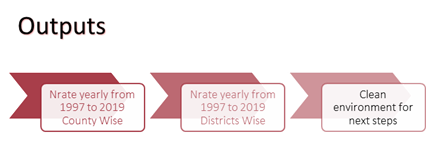

## Aggregate Nrate to USDA data 

### USDA data

#### Animal Data

Merge only animal data first
Interpolating data.
This part of the script (focused on animal data) will follow the workflow illustraded below:

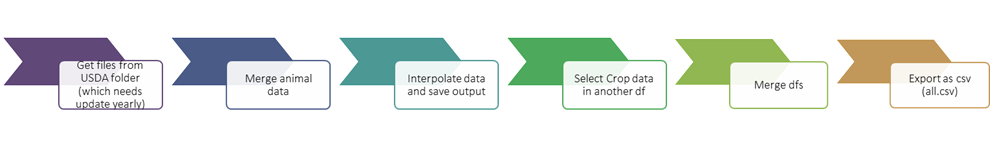

In [45]:
# For loop to have a list of all the data
import os
import pandas as pd
import numpy as np
import arcpy

# Import system modules
from arcpy import env

# path
dir_name1 = r'C:\\Users\jbrittes\Documents\Research\IFEW - Database Flow\ArcGIS\USDA_files\\'

files = os.listdir(dir_name1)

In [46]:
# only get ANIMAL counties data
filestoremove = ['cattle_slaughtered_head_state_ifew_ge1997.csv','hogs_slaughtered_head_state_ifew_ge1997.csv', 
                 'poultry_slaughtered_pounds_us_ifew_ge1997.csv', 'corn_grain_yield_buperacre_counties_ifew_ge1997.csv',
                 'corn_grain_area_harvested_acres_counties_ifew_ge1997.csv', 'corn_silage_area_harvested_acres_counties_ifew_ge1997.csv',
                 'corn_area_planted_acres_counties_ifew_ge1997.csv', 'corn_area_planted_acres_counties_ifew_ge1997.csv', 
                 'corn_silage_yield_tonsperacre_counties_ifew_ge1997.csv','soybeans_area_harvested_acres_counties_ifew_ge1997.csv', 
                 'soybeans_area_planted_acres_counties_ifew_ge1997.csv','soybeans_yield_buperacre_counties_ifew_ge1997.csv']

files = [x for x in files if x not in filestoremove]

In [47]:
path = dir_name1
for i in range(len(files)):
    f = os.path.join(path, files[i])

# try everrything in the same table so one shp

# create empty data frame
f = os.path.join(dir_name1, files[0])
df = pd.read_csv(f)

In [48]:
df.drop(df[['source_desc', 'sector_desc', 'group_desc', 'commodity_desc',
       'class_desc', 'prodn_practice_desc', 'util_practice_desc',
       'statisticcat_desc', 'unit_desc', 'short_desc', 'domain_desc',
       'domaincat_desc', 'agg_level_desc', 'state_ansi', 'state_name', 'county_ansi',
       'region_desc', 'zip_5', 'watershed_code',
       'watershed_desc', 'congr_district_code', 'country_code', 'country_name',
       'freq_desc', 'begin_code', 'end_code', 'reference_period_desc', 'week_ending', 'load_time', 'CV (%)']], axis=1)

,state_fips_code,state_alpha,asd_code,asd_desc,county_code,county_name,location_desc,year,Value
0,19,IA,10,NORTHWEST,21,BUENA VISTA,"IOWA, NORTHWEST, BUENA VISTA",2017,(D)
1,19,IA,10,NORTHWEST,21,BUENA VISTA,"IOWA, NORTHWEST, BUENA VISTA",2012,(D)
2,19,IA,10,NORTHWEST,21,BUENA VISTA,"IOWA, NORTHWEST, BUENA VISTA",2007,(D)
3,19,IA,10,NORTHWEST,21,BUENA VISTA,"IOWA, NORTHWEST, BUENA VISTA",2002,"4,405"
4,19,IA,10,NORTHWEST,21,BUENA VISTA,"IOWA, NORTHWEST, BUENA VISTA",1997,"4,472"
...,...,...,...,...,...,...,...,...,...
490,19,IA,90,SOUTHEAST,183,WASHINGTON,"IOWA, SOUTHEAST, WASHINGTON",2017,"9,874"
491,19,IA,90,SOUTHEAST,183,WASHINGTON,"IOWA, SOUTHEAST, WASHINGTON",2012,"7,914"
492,19,IA,90,SOUTHEAST,183,WASHINGTON,"IOWA, SOUTHEAST, WASHINGTON",2007,"14,142"
493,19,IA,90,SOUTHEAST,183,WASHINGTON,"IOWA, SOUTHEAST, WASHINGTON",2002,"9,394"


In [49]:
# Append data based on USDA csvs

for i in range(1,4):
    f1 = os.path.join(dir_name1, files[i])
    df_new = pd.read_csv(f1)
    df = pd.merge(df, df_new, on=['county_name', 'year'], how='left')

##### Interpolation 

In [50]:
# Drop duplicate columns
df2 = df.T.drop_duplicates().T

# Select only columns that matter
df3 = df2.iloc[:,[16,17,18,19,25,30,35,64,93]]

# Rename columns
df3.columns.values[0] = "asd_code"
df3.columns.values[1] = "asd_desc"
df3.columns.values[2] = "county_code"
df3.columns.values[4] = "Year"
df3.columns.values[5] = "BeefCows"
df3.columns.values[6] = "Hogs"
df3.columns.values[7] = "MilkCows"
df3.columns.values[8] = "OtherCattle"

# create empty dataframe to append to df5 to make it have data from 1997 to 2021 - add 20 spots for each county
# Initially is 495 = 99 counties x 5 census years (99*5)
names = df3.columns

df4 = pd.DataFrame(index=range(1980),columns=names)

# append 
df = df3.append(df4)

df = df.replace(" (D)", 0)

# change the type of data 
lst = ['BeefCows', "Hogs", "MilkCows", "OtherCattle"]
for k in lst:
    df[k]=df[k].str.replace(',', '')
    df[k] = pd.to_numeric(df[k])
    
df = df.fillna(0)    

df_c = df.copy().reset_index()

a = 0
x = 0

# populate the NA rows of columns Shape and AgDistrict.                  
for i in range(0,396):
    alpha = -1
    if (i % 4 == 0):
        x = x+1
        y = x+i
    for j in range(1,6):
        alpha = alpha+1
        if j==1:
            a = 495*j+i
        elif j!=1:
            a = (395*j+i)+100+alpha
        if i<=3:
            b = df['asd_code'][i].values[0]
            c = df['asd_desc'][i].values[0]
            d = df['county_code'][i].values[0]
            e = df['county_name'][i].values[0]
            df_c['asd_code'][a] = b
            df_c['asd_desc'][a] = c
            df_c['county_code'][a] = d
            df_c['county_name'][a] = e
        else:

            b = df['asd_code'][y].values[0]
            c = df['asd_desc'][y].values[0]
            d = df['county_code'][y].values[0]
            e = df['county_name'][y].values[0]
            df_c['asd_code'][a] = b
            df_c['asd_desc'][a] = c
            df_c['county_code'][a] = d
            df_c['county_name'][a] = e
            

# populate the Year Column with 1998, 1999, 2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2011, 2013, 2015, 2016, 2018, 2019, 2020, 2021
# list of dates
date_strings = [1998,1999,2000,2001,2003,2004,2005,2006,2008,2009,2010,2011,2013,2014,2015,2016,2018,2019,2020,2021]


# format
for j in range(1,6):
    for l in range (0,4):
        for k in range(0,99):
            
            if j==1:
                a = 495*j+l+4*k
                b = l
                df_c['Year'][a] = date_strings[b]
                
            if j==2:
                a = 495*j+l+4*k-99
                b = l+4
                df_c['Year'][a] = date_strings[b]       
            
            if j==3:
                a = 495*j+l+4*k-99*2                
                b = l+8
                df_c['Year'][a] = date_strings[b]    
            
            if j==4:
                a = 495*j+l+4*k-99*3              
                b = l+12
                df_c['Year'][a] = date_strings[b]
                
            if j==5:
                a = 495*j+l+4*k-99*4             
                b = l+16
                df_c['Year'][a] = date_strings[b]      
                
# Reorganize dataframe
df_org = df_c.sort_values(by = ['county_name', 'Year'], ignore_index=True)  

# look at the categories in AgDistrict
selection = df_org['county_name'].unique()

# create empty dataframe
animal = pd.DataFrame()                

for i in range(0,99):
    selected = df_org[df_org['county_name']==selection[i]]
    selected = selected.reset_index()
    selected = selected.drop(['index'], axis=1)
    y1=2002
    y2=1997
    for j in range(0,25):
        if selected['Year'][j] in [1998,1999,2000,2001]:
            y1 = 2002
            y2 = 1997                    
            
        elif selected['Year'][j] in [2003,2004,2005,2006]:
            y1 = 2007
            y2 = 2002
            
        elif selected['Year'][j] in [2008,2009,2010,2011]:
            y1 = 2012
            y2 = 2007
                  
        elif selected['Year'][j] in [2013,2014,2015,2016,2018,2019,2020,2021]:
            y1 = 2017
            y2 = 2012
     
        for k in lst:
            older = selected[selected['Year']== y1][k].values[0]
            newer = selected[selected['Year']== y2][k].values[0]
            now = selected['Year'][j]
    
            selected[k][j] = older-(((y1-now)*(older-newer))/(y1-y2))  
    # append every set in the animal dataframe                  
    animal = animal.append(selected, ignore_index=True)  

animal

,level_0,asd_code,asd_desc,county_code,county_name,Year,BeefCows,Hogs,MilkCows,OtherCattle
0,0,70.0,SOUTHWEST,1.0,ADAIR,1997.0,23830.0,36650.0,314.0,0.0
1,1,70.0,SOUTHWEST,1.0,ADAIR,1998.0,23521.8,35024.0,290.2,6157.8
2,2,70.0,SOUTHWEST,1.0,ADAIR,1999.0,23213.6,33398.0,266.4,12315.6
3,3,70.0,SOUTHWEST,1.0,ADAIR,2000.0,22905.4,31772.0,242.6,18473.4
4,4,70.0,SOUTHWEST,1.0,ADAIR,2001.0,22597.2,30146.0,218.8,24631.2
...,...,...,...,...,...,...,...,...,...,...
2470,2470,20.0,NORTH CENTRAL,197.0,WRIGHT,2017.0,2363.0,483527.0,0.0,4277.0
2471,2471,20.0,NORTH CENTRAL,197.0,WRIGHT,2018.0,2261.8,483474.4,0.0,4600.2
2472,2472,20.0,NORTH CENTRAL,197.0,WRIGHT,2019.0,2160.6,483421.8,0.0,4923.4
2473,2473,20.0,NORTH CENTRAL,197.0,WRIGHT,2020.0,2059.4,483369.2,0.0,5246.6


#### Crop data

Add data from crops

In [51]:
files = os.listdir(dir_name1)

# only get counties and crop data
filestoremove = ['cattle_slaughtered_head_state_ifew_ge1997.csv','hogs_slaughtered_head_state_ifew_ge1997.csv', 
                 'poultry_slaughtered_pounds_us_ifew_ge1997.csv', 'beef_cows_head_inventory_counties_ifew_ge1997.csv', 
                 'hogs_head_inventory_counties_ifew_ge1997.csv', 'milk_cows_head_inventory_counties_ifew_ge1997.csv', 
                 'other_cattle_head_inventory_counties_ifew_ge1997.csv']

files = [x for x in files if x not in filestoremove]

for i in range(len(files)):
    f = os.path.join(path, files[i])   
    
# create empty data frame
f = os.path.join(dir_name1, files[0])
df = pd.read_csv(f)    

df.drop(df[['source_desc', 'sector_desc', 'group_desc', 'commodity_desc',
       'class_desc', 'prodn_practice_desc', 'util_practice_desc', "location_desc",
       'statisticcat_desc', 'unit_desc', 'short_desc', 'domain_desc',
       'domaincat_desc', 'agg_level_desc', 'state_ansi', 'state_name', 'county_ansi',
       'region_desc', 'zip_5', 'watershed_code', "state_fips_code", "state_alpha",
       'watershed_desc', 'congr_district_code', 'country_code', 'country_name',
       'freq_desc', 'begin_code', 'end_code', 'reference_period_desc', 'week_ending', 'load_time', 'CV (%)']], axis=1)

# Append data based on USDA csvs
for i in range(1,8):
    f1 = os.path.join(dir_name1, files[i])
    df_new = pd.read_csv(f1)
    df = pd.merge(df, df_new, on=['county_name', 'year'], how='left')
    
# Drop duplicate columns
df2 = df.T.drop_duplicates().T    

# Select only columns that matter
df3 = df2.iloc[:,[16,17,18,19,25,29,34,39, 67, 72,100, 104, 109]]

# Rename columns
df3.columns.values[0] = "asd_code"
df3.columns.values[1] = "asd_desc"
df3.columns.values[2] = "county_code"
df3.columns.values[4] = "Year"
df3.columns.values[5] = "CornAcresPlanted"
df3.columns.values[6] = "CornGrainAcresHarvested"
df3.columns.values[7] = "CornGrainYield_bupacre"
df3.columns.values[8] = "CornSilageAcresHarvested"
df3.columns.values[9] = "CornSilageYield_tonspacre"
df3.columns.values[10] = "SoybeansAcresHarvested"
df3.columns.values[11] = "SoybeansAcresPlanted"
df3.columns.values[12] = "SoybeansYield_bupacre"

df3

,asd_code,asd_desc,county_code,county_name,Year,CornAcresPlanted,CornGrainAcresHarvested,CornGrainYield_bupacre,CornSilageAcresHarvested,CornSilageYield_tonspacre,SoybeansAcresHarvested,SoybeansAcresPlanted,SoybeansYield_bupacre
0,10,NORTHWEST,21,BUENA VISTA,2021,"160,000","157,200",204.7,NaN,NaN,"145,400","146,500",62.7
1,10,NORTHWEST,21,BUENA VISTA,2020,"167,500","164,900",183.9,NaN,NaN,NaN,NaN,NaN
2,10,NORTHWEST,21,BUENA VISTA,2019,"170,500","167,900",190.8,NaN,NaN,"135,800","137,000",53.5
3,10,NORTHWEST,21,BUENA VISTA,2018,"164,000","161,400",193.1,NaN,NaN,"142,300","144,000",55.5
4,10,NORTHWEST,21,BUENA VISTA,2017,"166,500","163,600",187.9,NaN,NaN,"142,700","143,500",56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,90,SOUTHEAST,183,WASHINGTON,2001,"101,000","98,600",148.1,"1,800",19.4,"102,100","103,000",45.3
2427,90,SOUTHEAST,183,WASHINGTON,2000,"113,000","110,800",144.1,"2,000",14.9,"103,800","104,000",40.7
2428,90,SOUTHEAST,183,WASHINGTON,1999,"113,000","110,500",143.7,"2,400",17.6,"104,800","105,000",45.4
2429,90,SOUTHEAST,183,WASHINGTON,1998,"120,400","117,900",134.7,"2,200",13.1,"102,400","103,000",50.8


#### Merge Crop and Animal

In [52]:
# animal must be first because has longer dataframe
df_total = pd.merge(animal, df3, on=['asd_code', 'asd_desc', 'county_code','county_name', 'Year'], how='left')

df_total = df_total.drop(df_total[['level_0']], axis=1)

df_total.to_csv(r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\all.csv", header = True, encoding='utf-8')

### Merge Animal, Crop and Nrate Data

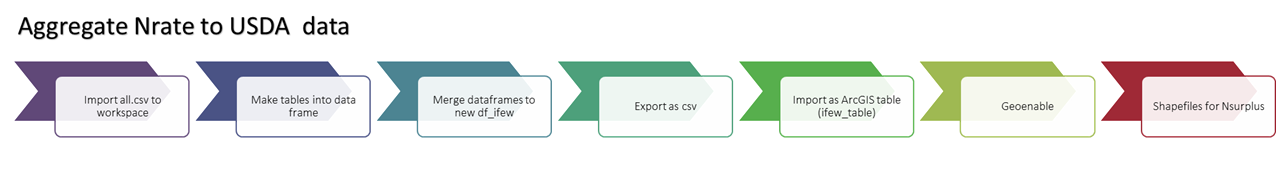

In [53]:
# Convert csv to table view in ArcGIS and add to Geodatabase
# Set local variables
outLocation = r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb"
arcpy.TableToTable_conversion(r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\all.csv", outLocation, "all_t")

<Result 'C:\\Users\\jbrittes\\Documents\\Research\\Rate of Commercial N\\Historical Nitrogen\\N fertilizer maps US from 2022\\N fertilizer data\\N_fertilizer_Peiyu.gdb\\all_t'>

In [54]:
# Convert Time Field
arcpy.management.ConvertTimeField("all_t", "Year", "yyyy", "year_Converted", "DATE")

# Delete old county_code field and year field to
arcpy.management.DeleteField("all_t", ["Year"])

<Result 'all_t'>

In [55]:
import arcpy
import pandas as pd

def arcgis_table_to_df(in_fc, input_fields=None, query=""):
    """Function will convert an arcgis table into a pandas dataframe with an object ID index, and the selected
    input fields using an arcpy.da.SearchCursor.
    :param - in_fc - input feature class or table to convert
    :param - input_fields - fields to input to a da search cursor for retrieval
    :param - query - sql query to grab appropriate values
    :returns - pandas.DataFrame"""
    OIDFieldName = arcpy.Describe(in_fc).OIDFieldName
    if input_fields:
        final_fields = [OIDFieldName] + input_fields
    else:
        final_fields = [field.name for field in arcpy.ListFields(in_fc)]
    data = [row for row in arcpy.da.SearchCursor(in_fc,final_fields,where_clause=query)]
    fc_dataframe = pd.DataFrame(data,columns=final_fields)
    fc_dataframe = fc_dataframe.set_index(OIDFieldName,drop=True)
    return fc_dataframe

def arcgis_table_to_dataframe(in_fc, input_fields, query="", skip_nulls=False, null_values=None):
    """Function will convert an arcgis table into a pandas dataframe with an object ID index, and the selected
    input fields. Uses TableToNumPyArray to get initial data.
    :param - in_fc - input feature class or table to convert
    :param - input_fields - fields to input into a da numpy converter function
    :param - query - sql like query to filter out records returned
    :param - skip_nulls - skip rows with null values
    :param - null_values - values to replace null values with.
    :returns - pandas dataframe"""
    OIDFieldName = arcpy.Describe(in_fc).OIDFieldName
    if input_fields:
        final_fields = [OIDFieldName] + input_fields
    else:
        final_fields = [field.name for field in arcpy.ListFields(in_fc)]
    np_array = arcpy.da.TableToNumPyArray(in_fc, final_fields, query, skip_nulls, null_values)
    object_id_index = np_array[OIDFieldName]
    fc_dataframe = pd.DataFrame(np_array, index=object_id_index, columns=input_fields)
    return fc_dataframe

In [57]:
# get tables as csv to dataframe to make merge
df_all_t = arcgis_table_to_df("all_t")
df_nrate = arcgis_table_to_df("nrate_counties")
df_nrate.rename(columns={"USDA_Counties_code":"county_code"}, inplace=True)
df_all_t.rename(columns={"year_Converted":"Year"}, inplace=True)

# merge tables
df_ifew = df_all_t.merge(df_nrate[['county_code','Year', 'MEAN_Nrate_lbperac']])
df_ifew.drop(["Field1"], axis=1)

,asd_code,asd_desc,county_code,county_name,BeefCows,Hogs,MilkCows,OtherCattle,CornAcresPlanted,CornGrainAcresHarvested,CornGrainYield_bupacre,CornSilageAcresHarvested,CornSilageYield_tonspacre,SoybeansAcresHarvested,SoybeansAcresPlanted,SoybeansYield_bupacre,Year,MEAN_Nrate_lbperac
0,70.0,SOUTHWEST,1.0,ADAIR,23830.0,36650.0,314.0,0.0,99500.0,96400.0,120.1,2800.0,15.8,94500.0,95900.0,40.1,1997-01-01,56.815510
1,70.0,SOUTHWEST,1.0,ADAIR,23521.8,35024.0,290.2,6157.8,104600.0,101300.0,142.7,3300.0,16.5,94500.0,95100.0,43.4,1998-01-01,55.715584
2,70.0,SOUTHWEST,1.0,ADAIR,23213.6,33398.0,266.4,12315.6,106000.0,103600.0,139.3,2300.0,13.3,100800.0,101000.0,42.2,1999-01-01,57.442476
3,70.0,SOUTHWEST,1.0,ADAIR,22905.4,31772.0,242.6,18473.4,105000.0,102700.0,131.8,2000.0,14.9,101800.0,102000.0,40.0,2000-01-01,54.026953
4,70.0,SOUTHWEST,1.0,ADAIR,22597.2,30146.0,218.8,24631.2,102000.0,99600.0,127.3,2000.0,16.3,98400.0,99000.0,39.2,2001-01-01,50.880356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,20.0,NORTH CENTRAL,197.0,WRIGHT,2565.4,483632.2,0.0,3630.6,180000.0,176900.0,198.4,NaN,NaN,132900.0,133500.0,59.0,2015-01-01,74.058422
2273,20.0,NORTH CENTRAL,197.0,WRIGHT,2464.2,483579.6,0.0,3953.8,200000.0,198000.0,200.2,NaN,NaN,120300.0,121000.0,58.8,2016-01-01,79.108049
2274,20.0,NORTH CENTRAL,197.0,WRIGHT,2363.0,483527.0,0.0,4277.0,183000.0,182400.0,206.9,NaN,NaN,132800.0,133500.0,57.9,2017-01-01,80.629398
2275,20.0,NORTH CENTRAL,197.0,WRIGHT,2261.8,483474.4,0.0,4600.2,182000.0,179500.0,180.5,NaN,NaN,128800.0,130500.0,52.6,2018-01-01,72.500668


In [58]:
#Export as ArcGIS table
arcpy.env.overwriteOutput = True
# export table and add it again to database. Rewrite in already created tables
df_ifew.to_csv(r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\all.csv", header = True, encoding='utf-8')

# Convert csv to table view in ArcGIS and add to Geodatabase
# Set local variables
outLocation = r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb"
arcpy.TableToTable_conversion(r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\all.csv", outLocation, "ifew_table")

<Result 'C:\\Users\\jbrittes\\Documents\\Research\\Rate of Commercial N\\Historical Nitrogen\\N fertilizer maps US from 2022\\N fertilizer data\\N_fertilizer_Peiyu.gdb\\ifew_table'>

### Geoenable

In [59]:
# Clear space
layers = m.listLayers()
for layer in layers:
    if layer.name in ["nrate_districts","nrate_counties"]:
        m.removeLayer(layer)        

arcpy.management.Delete("all_t")       

# Call back for layers
m.addDataFromPath(fc_counties)
m.addDataFromPath(fc_districts)

#### Counties

In [62]:
#Join ifew table to Counties
arcpy.gapro.JoinFeatures("Iowa_Counties", "ifew_table", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\IFEW_Counties", "JOIN_ONE_TO_MANY", '', None, '', None, "USDA_Counties_code county_code", None, '', None)

<Result 'C:\\Users\\jbrittes\\Documents\\Research\\Rate of Commercial N\\Historical Nitrogen\\N fertilizer maps US from 2022\\N fertilizer data\\N_fertilizer_Peiyu.gdb\\IFEW_Counties'>

#### AgDistricts

Fields need to be dissolved related to time and location (Year and ag districts). Fields related to population or area can be just added. Fields with yields or application rates, need to be averaged. 

In [64]:
arcpy.env.overwriteOutput = True
# Dissolve Fields 
arcpy.management.Dissolve("IFEW_Counties", r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\IFEW_Agdistricts", "asd_code;Year;asd_desc", "SHAPE_Area SUM;BeefCows SUM;CornAcresPlanted SUM;CornGrainAcresHarvested SUM;CornGrainYield_bupacre MEAN;CornSilageAcresHarvested SUM;CornSilageYield_tonspacre MEAN;Hogs SUM;MEAN_Nrate_lbperac MEAN;MilkCows SUM;OtherCattle SUM;SoybeansAcresHarvested SUM;SoybeansAcresPlanted SUM;SoybeansYield_bupacre MEAN", "MULTI_PART", "DISSOLVE_LINES")

<Result 'C:\\Users\\jbrittes\\Documents\\Research\\Rate of Commercial N\\Historical Nitrogen\\N fertilizer maps US from 2022\\N fertilizer data\\N_fertilizer_Peiyu.gdb\\IFEW_Agdistricts'>

In [65]:
# Organize Fields
fieldList = arcpy.ListFields("IFEW_Agdistricts")
old_names = ["SUM_BeefCows", "SUM_CornAcresPlanted", "SUM_CornGrainAcresHarvested", "MEAN_CornGrainYield_bupacre",
             "SUM_CornSilageAcresHarvested", "MEAN_CornSilageYield_tonspacre", "SUM_Hogs",
             "MEAN_MEAN_Nrate_lbperac", "SUM_MilkCows", "SUM_OtherCattle", "SUM_SoybeansAcresHarvested", 
             "SUM_SoybeansAcresPlanted", "MEAN_SoybeansYield_bupacre"]

new_names = ["BeefCows", "CornAcresPlanted", "CornGrainAcresHarvested", "CornGrainYield_bupacre",
             "CornSilageAcresHarvested", "CornSilageYield_tonspacre", "Hogs",
             "Nrate_lbperac", "MilkCows", "OtherCattle", "SoybeansAcresHarvested", 
             "SoybeansAcresPlanted", "SoybeansYield_bupacre"]

i=0
for field in fieldList:
    old = old_names[i]
    if field.name == old:
        name = new_names[i]
        arcpy.AlterField_management("IFEW_Agdistricts", field.name, new_field_name = name, new_field_alias = name)
        i = i+1

IndexError: list index out of range

<span style='color:Red'> Clear the environment. </span>

In [66]:
# Clear space
layers = m.listLayers()
for layer in layers:
    if layer.name in ["Iowa_Counties","Iowa_CropDistricts"]:
        m.removeLayer(layer)        

arcpy.management.Delete("ifew_table")   

<Result 'true'>

## Calculate Nsurplus variables (and others)

The script below will use Vishal's Nitrogen Surplus model according to the workflow in the figure below:

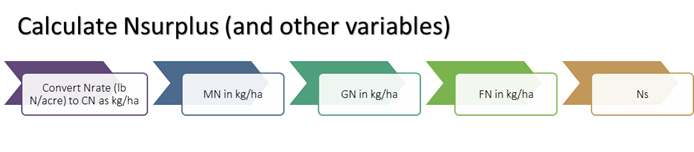

In Vishal's study "the MDAO approach is applied to the IFEW system to model the synergies of the inherently coupled food, water, and energy disciplines with the goal of meeting Iowa’s agricultural demands. The purpose of the model is to provide critical information regarding the complex interdependencies to enable efficient policy and decision making in Iowa with respect to the environmental impact of the nitrogen export."
In particular, the IFEWs model involves five individual systems representing weather, water, agriculture, animal agriculture,and energy. The below modeling addresses the agricutlure and water (nitrogen surplus as a water quality indicador) of the IFEWs. 

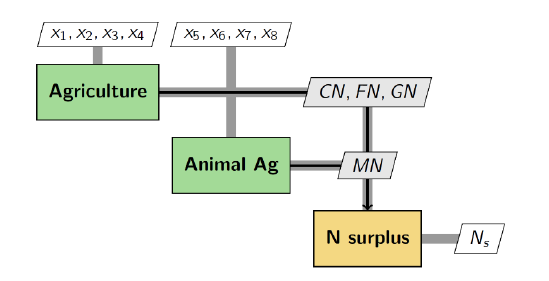

"The calculation of nitrogen surplus (Ns) is based on the construction of a rough agronomic annual nitrogen budget (Blesh and Drinkwater, 2013; Jones et al., 2019a) given as:

$$ Ns = CN + MN + FN - GN $$

where CN is the input from the application of commercial nitrogen, MN is the nitrogen generated from manure, FN is the nitrogen fixed by soybean crop, and GN is the nitrogen present in harvested grain."

"The agriculture system receives four input parameters: the corn yield ($x_1$), soybean yield ($x_2$), rate of commercial, nitrogen for corn ($x_3$), and the rate of commercial nitrogen, for soybean ($x_4$). The output parameters of the agriculture, system are CN, FN, and GN." In this current document, we make no distinction between rates of commercial nitrogen ($x_3$, $x_4$). The commercial nitrogen (CN) is defined as equal to the average of the spatially explicit time-series data set of nitrogen (N) fertilizer use in agricultural land of the continental U.S provided by Peiyu Cao in kg/ha.

$$ CN = N_{rate} kg/ha $$ 

"The biological nitrogen fixation from the soybean crop is estimated based on relationship provided by Barry et al. (1993) and is given by:"

$$ FN = (81.1x_2-98.5)A_{soy}/A $$

where $A_{soy}$ represents Iowa soybean acreage while the $A$ represents the total area under corn and soybean crop (**planted area**), and $x_2$ in this case is the soybean yield in *tons per hectare*.

"Lastly, nitrogen exported in the harvested corn and soybean grain is computed to be 6.4% nitrogen in the soybean seed and 1.18% nitrogen in the corn seed (Blesh and Drinkwater, 2013) and is defined as:"

$$ GN = \left(x_1\left(\frac{1.18}{100}\right)A_{corn} + x_2\left(\frac{6.4}{100}\right)A_{soy}\right)/A $$

Where the areas refer to **harvested areas**.

For this work, the yields comes from yearly USDA reports.

"The animal agriculture system receives four input parameters, namely, the total hog/pig population ($x_5$), number of beef cows ($x_6$), number of milk cows ($x_7$), and the number of other cattle ($x_8$) which includes the population steers, heifers, and slaughter cattle. According to USDA (2020), Iowa holds first rank in red meat, pork, and egg production, however, the amount of nitrogen in poultry is much less than hogs and cattle. Thus, to keep the minimum number of parameters in our system model, only hog/pig and cattle populations are used for the MN calculation.The annual manure nitrogen contribution of each animal type is given by (Gronberg and Arnold, 2017):

$$ MN_{animal} = PA_{MN}LF $$

where P, AMN and LF are livestock group population, nitrogen in animal manure and life cycle of animal. Table 1 provides the numerical values of the parameters used for calculation of MN for each livestock group. The total MN contribution is then normalized using area $A$ (**crops planted area**) is given as:

 $$ MN = (MN_{Hogs} + MN_{BeefCattle} + MN_{MilkCow} + MN_{OtherCattle})/A $$

In the same way, the animal population uses USDA as the source, but because of the lack of yearly data (only Census years are available) we interpolated the USDA data extending our data availability.

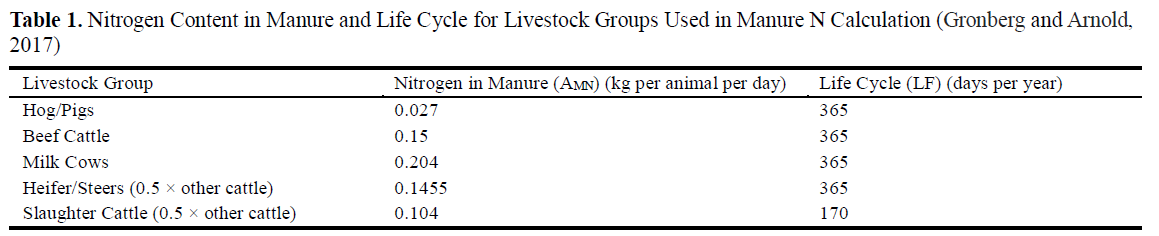

More information can be found here <a href="http://www.jeiletters.org/index.php?journal=mys&page=article&op=view&path%5B%5D=202000044&path%5B%5D=pdf_202000044">System Modeling and Sensitivity Analysis of the Iowa Food-Water-Energy Nexus</a>

### Commercial Nitrogen in kg/ha

In [11]:
# Here we convert Nrate in lb/ac to kg/ha
# in kg/ha
# Add Field - Counties
# Calculate Field
arcpy.management.CalculateField("IFEW_Counties", "CommercialN_kg_ha", "round(!MEAN_Nrate_lbperac! * 1.121,2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

# Add Field - AgDistricts
# Calculate Field
arcpy.management.CalculateField("IFEW_Agdistricts", "CommercialN_kg_ha", "round(!Nrate_lbperac!*1.121,2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

<Result 'IFEW_Agdistricts'>

### Manure Nitrogen in kg/ha

<span style='color:Red'> Dont love the values for agdistricts. </span>

Total Crop area planted

In [102]:
import sys
sys.tracebacklimit=0

In [10]:
# in kg/ha
# Add Field - Counties
# Calculate Field
try:
    arcpy.management.CalculateField("IFEW_Counties", "ManureN_kg_ha", "round((!Hogs!*0.027*365 + !MilkCows!*0.204*365 + !BeefCows!*0.15*365 + !OtherCattle!*0.5*0.1455*365 + !OtherCattle!*0.5*0.104*170)/(0.404686*(!SoybeansAcresPlanted! + !CornAcresPlanted!)),2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

# Add Field - AgDistricts
# Calculate Field
    arcpy.management.CalculateField("IFEW_Agdistricts", "ManureN_kg_ha", "round((!Hogs!*0.027*365 + !MilkCows!*0.204*365 + !BeefCows!*0.15*365 + !OtherCattle!*0.5*0.1455*365 + !OtherCattle!*0.5*0.104*170)/(0.404686*(!SoybeansAcresPlanted! + !CornAcresPlanted!)),2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")
except TypeError:
    pass

Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported op

### Grain Nitrogen in kg/ha

According to http://www.solluscapital.com.br/English/conversion_table.html
    1 bu/acre corn = 62.77 kg/ha
    1 bu/acre soybeans = 67.25 kg/ha

Corn grain harvested and total crop area harvested 

In [9]:
# in kg/ha
# Counties
# Calculate Field
arcpy.management.CalculateField("IFEW_Counties", "GrainN_kg_ha", "round(((!SoybeansYield_bupacre!*67.25)*(6.4/100)*(!SoybeansAcresHarvested!*0.404686)+(!CornGrainYield_bupacre!*62.77)*(1.18/100)*!CornGrainAcresHarvested!*0.404686)/(0.404686*(!SoybeansAcresHarvested!+!CornGrainAcresHarvested!)),2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

# AgDistricts
# Calculate Field
arcpy.management.CalculateField("IFEW_Agdistricts", "GrainN_kg_ha", "round(((!SoybeansYield_bupacre!*67.25)*(6.4/100)*(!SoybeansAcresHarvested!*0.404686)+(!CornGrainYield_bupacre!*62.77)*(1.18/100)*!CornGrainAcresHarvested!*0.404686)/(0.404686*(!SoybeansAcresHarvested!+!CornGrainAcresHarvested!)),2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) f

<Result 'IFEW_Agdistricts'>

### Fixation Nitrogen in kg/ha

Planted Area Crops

For soybeans bushels consider **1 metric ton/hectare = 14.87 (15) bushels/acre**
from https://www.extension.iastate.edu/agdm/wholefarm/pdf/c6-80.pdf

In [8]:
# in kg/ha
# Add Field - Counties
# Calculate Field
arcpy.management.CalculateField("IFEW_Counties", "FixatedN_kg_ha", "round(((!SoybeansYield_bupacre!/15)*81.1-98.5)*!SoybeansAcresPlanted!/(!SoybeansAcresPlanted!+!CornAcresPlanted!),2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

# Add Field - AgDistricts
# Calculate Field
arcpy.management.CalculateField("IFEW_Agdistricts", "FixatedN_kg_ha", "round(((!SoybeansYield_bupacre!/15)*81.1-98.5)*!SoybeansAcresPlanted!/(!SoybeansAcresPlanted!+!CornAcresPlanted!),2)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for /: 'NoneT

<Result 'IFEW_Agdistricts'>

### Nitrogen Surplus

In [12]:
# in kg/ha
# Create and calculate Field - Counties
arcpy.management.CalculateField("IFEW_Counties", "NitrogenSurplus_kg_ha", "round(!CommercialN_kg_ha!+!ManureN_kg_ha!+!FixatedN_kg_ha!-!GrainN_kg_ha!,1)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

# Create and calculate Field - Agdistricts
arcpy.management.CalculateField("IFEW_Agdistricts", "NitrogenSurplus_kg_ha", "round(!CommercialN_kg_ha!+!ManureN_kg_ha!+!FixatedN_kg_ha!-!GrainN_kg_ha!,1)", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: unsupported operand type(s) f

<Result 'IFEW_Agdistricts'>

<span style='color:Green'> Enable time </span> <span style='color:Red'> - Any way of automating it? </span> 
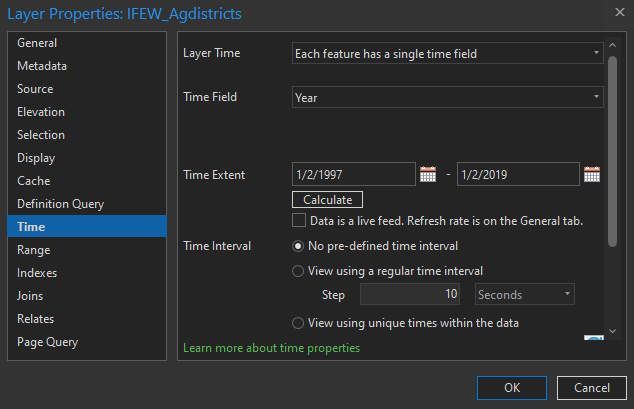

## Extra - data organization

### Round Inventory Numbers 

Because inventory numbers are mostly interpolated values (exception of census years), they might have decimal values. They should be rounded up.

In [111]:
# Animal Inventory
# Counties
arcpy.management.CalculateField("IFEW_Counties", "BeefCows", "round(!BeefCows!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("IFEW_Counties", "Hogs", "round(!Hogs!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("IFEW_Counties", "MilkCows", "round(!MilkCows!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("IFEW_Counties", "OtherCattle", "round(!OtherCattle!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")

# Agdistricts
arcpy.management.CalculateField("IFEW_Agdistricts", "BeefCows", "round(!BeefCows!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("IFEW_Agdistricts", "Hogs", "round(!Hogs!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("IFEW_Agdistricts", "MilkCows", "round(!MilkCows!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("IFEW_Agdistricts", "OtherCattle", "round(!OtherCattle!,0)", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")


<Result 'IFEW_Agdistricts'>

#### Making a field for Grain nitrogen negative - for graphical purposes

In [14]:
# Counties
arcpy.management.CalculateField("IFEW_Counties", "GrainN_neg_kg/ha", "-!GrainN_kg_ha!", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

# Agdistricts
arcpy.management.CalculateField("IFEW_Agdistricts", "GrainN_neg_kg/ha", "-!GrainN_kg_ha!", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")

Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: bad operand type for unary -: 'NoneType'
Traceback (most recent call last):
  File "<expression>", line 1, in <module>
TypeError: b

<Result 'IFEW_Agdistricts'>

### Land Use - Dr. Raj

Land Use portion is in another document - Iowa Land Use project
This project will have the pastureland vs cropland

#### Add TC/TRP ratio

where TC = total cropland and TRP = total ruminant population

In [5]:
# TC/TRP ratio
# Counties
arcpy.management.CalculateField("IFEW_Counties", "TC/TRP", "((!CornAcresPlanted!+!SoybeansAcresPlanted!)/(!BeefCows!+!MilkCows!+!OtherCattle!))", "PYTHON3", '', "FLOAT", "NO_ENFORCE_DOMAINS")
# Agdistricts
arcpy.management.CalculateField("IFEW_Agdistricts", "TC/TRP", "((!CornAcresPlanted!+!SoybeansAcresPlanted!)/(!BeefCows!+!MilkCows!+!OtherCattle!))", "PYTHON3", '', "SHORT", "NO_ENFORCE_DOMAINS")

ExecuteError: ERROR 000013: TC_TRP already in IFEW_Counties
Failed to execute (CalculateField).


In [147]:
# Districts
arcpy.EnableEditorTracking_management(r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\IFEW_Agdistricts","Creator","Created","Editor","Edited","ADD_FIELDS","UTC")
# Counties
arcpy.EnableEditorTracking_management(r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data\N_fertilizer_Peiyu.gdb\IFEW_Counties","Creator","Created","Editor","Edited","ADD_FIELDS","UTC")

<Result 'C:\\Users\\jbrittes\\Documents\\Research\\Rate of Commercial N\\Historical Nitrogen\\N fertilizer maps US from 2022\\N fertilizer data\\N_fertilizer_Peiyu.gdb\\IFEW_Counties'>

## Energy 

"Iowa produces more fuel ethanol and biodiesel than any other state in the nation." (source: <a href="https://www.eia.gov/state/analysis.php?sid=IA#:~:text=Iowa%20is%20the%20top%20fuel,consumed%20annually%20in%20the%20state">EIA</a>)

EIA API

KEY:
7LNTDcGUDA05bwpusgcglzlyFtrdGA6fGEo6t1Gm


X-Params: {
    "frequency": "annual",
    "data": [
        "value"
    ],
    "facets": {
        "seriesId": [
            "ENPRP",
            "ENTCK",
            "ENTCP"
        ],
        "stateId": [
            "IA"
        ]
    },
    "start": null,
    "end": null,
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000,
    "api-version": "2.0.2"
}

In [ ]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker

In [ ]:
# API Key from EIA
api_key = 'PASTE YOUR API KEY HERE'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
PADD_NAMES = ['ENPRP','ENTCK','ENTCP']
# Enter all your Series IDs here separated by commas
PADD_KEY = ['PET.MCRRIP12.M',
'PET.MCRRIP22.M',
'PET.MCRRIP32.M',
'PET.MCRRIP42.M',
'PET.MCRRIP52.M']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2009-01-01'
endDate = '2021-01-01'

### Mass Flow

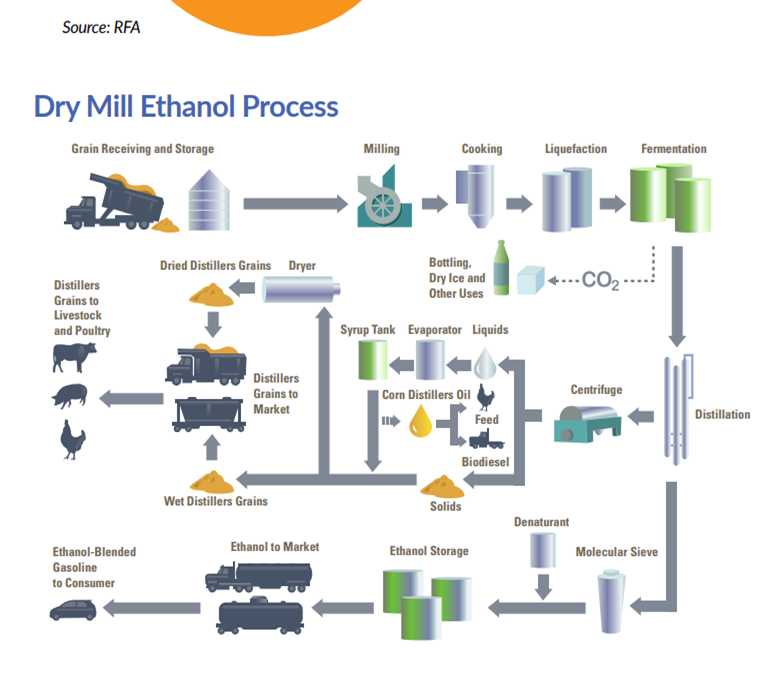

Through mass flow we propose the energy-corn relationship:

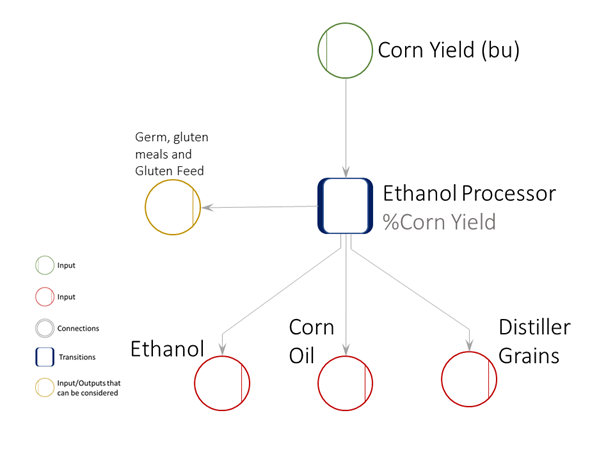

Looking at historical patterns between ethanol production and corn usage, we obtain

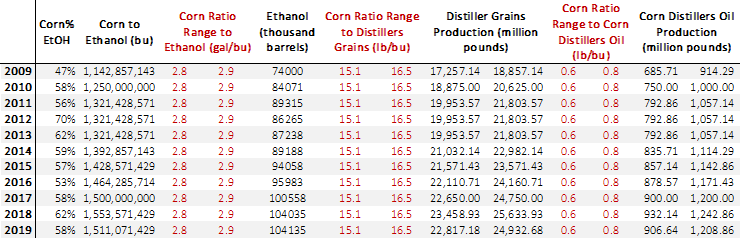

Using corn ratio to Ethanol (gal/bu) as 2.7, we calculate the Ethanol production county participation estimation

#### Ethanol

In [ ]:
Get EIA data for comparison reasons.

#### Ethanol Co Product

##### Distillers Grains

##### Distillers Oil

## Export Layers

In [154]:
import os
# Sign in to portal
arcpy.SignInToPortal("https://isugisf.maps.arcgis.com ", "", "")


# Set output file names
outdir = r"C:\Users\jbrittes\Documents\Research\Rate of Commercial N\Historical Nitrogen\N fertilizer maps US from 2022\N fertilizer data"
service_name = "IFEW"
sddraft_filename = service_name + ".sddraft"
sddraft_output_filename = os.path.join(outdir, sddraft_filename)
sd_filename = service_name + ".sd"
sd_output_filename = os.path.join(outdir, sd_filename)


# Reference map to publish
aprx = arcpy.mp.ArcGISProject("CURRENT")
m = aprx.listMaps()[0]
m = aprx.listMaps("Map")[0]

# Create FeatureSharingDraft and set metadata, portal folder, and export data properties
server_type = "HOSTING_SERVER"
sddraft = m.getWebLayerSharingDraft(server_type, "FEATURE", service_name)
sddraft.credits = "USDA Quickstats, Cao Peiyu"
sddraft.description = "IFEW Animal, Crop and Nrate data." 
sddraft.summary = "This is a dataset developed for the IFEWs. The Ag data (animal and crop) are obtained from USDA quickstats. Nitrogen rates are obtained from the N fertilizer of Peiyu Cao research team. Considering the mentioned data our inputs, using Vishal's equations from 'System Modeling and Sensitivity Analysis of the Iowa Food-Water-Energy Nexus' we obtained values for Nitrogen sources and thus an estimation of Nitrogen Surplus in kg/ha"
sddraft.tags = "IFEWs"
sddraft.useLimitations = "These are use limitations"
sddraft.portalFolder = "IFEW, USDA"
sddraft.allowExporting = True

# Set Overwrite Property
sddraft.overwriteExistingService = True


# Create Service Definition Draft file
sddraft.exportToSDDraft(sddraft_output_filename)

# Stage Service
print("Start Staging")
arcpy.StageService_server(sddraft_output_filename, sd_output_filename)

# Share to portal
print("Start Uploading")
arcpy.UploadServiceDefinition_server(sd_output_filename, server_type)
print("Finish Publishing")

Start Uploading
Finish Publishing


<span style='color:Green'> Always remember to share tools in ArcGIS online and dashboard. </span>

https://www.esri.com/content/dam/esrisites/en-us/about/events/media/UC-2019/technical-workshops/tw-7108-919.pdf

In [ ]:
## Make Maps